In [1]:
# http://arohatgi.info/WebPlotDigitizer/app/
# http://arxiv.org/abs/1107.4367

In [1]:
%pylab inline

rc('text', usetex=True, fontsize=28)

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:857: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
data = loadtxt('Westphal-BX154_kulas_data.csv', delimiter=',')

x = data[:,0]/(1+2.5954) #redshift z = 2.5954
y = data[:,1]

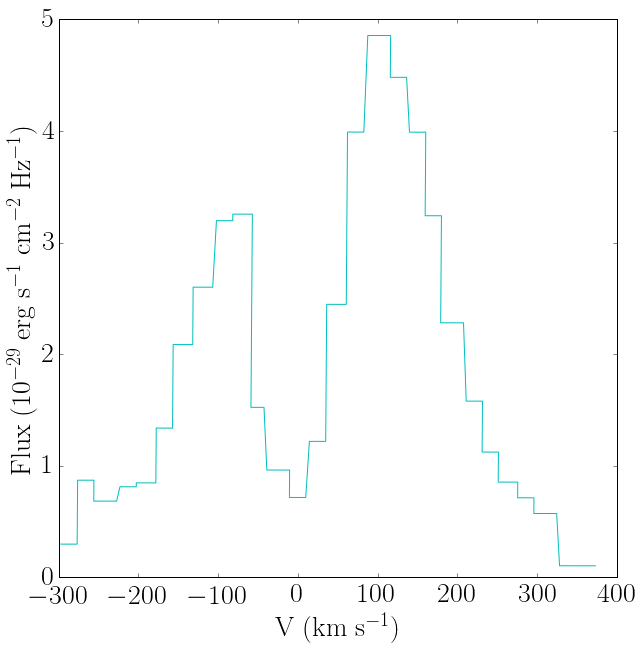

In [3]:
f = figure(figsize = (10,10))
plot(x,y,c='c')
xlabel('$\mathrm{V\;(km\;s^{-1})}$')
ylabel('$\mathrm{Flux\;(10^{-29}\;erg\;s^{-1}\;cm^{-2}\;Hz^{-1})}$')
savefig('observation_v.png')

In [4]:
v_th = -12.8
x_x = flipud(x/v_th)
y_x = flipud(y)

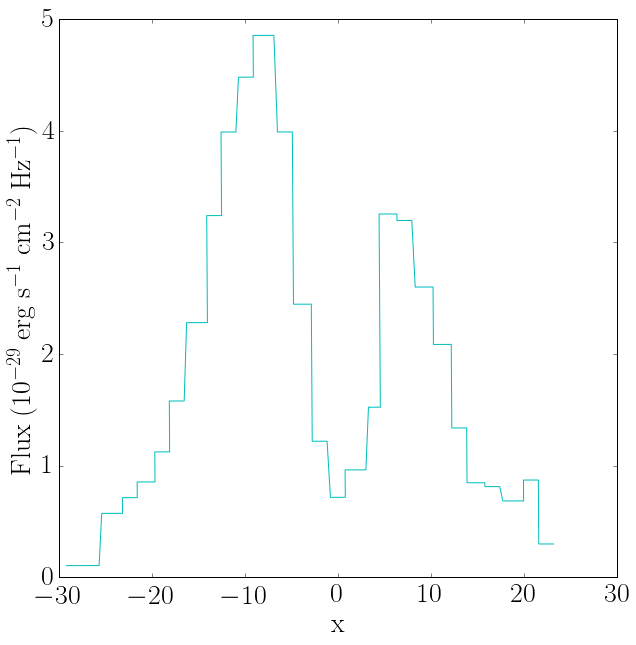

In [5]:
f = figure(figsize = (10,10))
plot(x_x,y_x,c='c')
xlabel('$\mathrm{x}$')
ylabel('$\mathrm{Flux\;(10^{-29}\;erg\;s^{-1}\;cm^{-2}\;Hz^{-1})}$')
savefig('observation_x.png')

In [6]:
from emcee_skewed_gaussian import emcee_skewed_gaussian, sum_2_skewed_gaussian

In [7]:
x_xp = zeros(len(x_x)/2)
y_xp = zeros(len(y_x)/2)

for i in range(len(x_xp)):
    x_xp[i] = (x_x[2*i+1]+x_x[2*i])/2
    y_xp[i] = y_x[2*i]

In [8]:
#Initial guess

half = len(y_x)/2
    
#First guess
amplitude_neg = 65
center_neg = -4
sigma_neg = 9
gamma_neg = -4
amplitude_pos = 38
center_pos = 2
sigma_pos = 8
gamma_pos = 4

x_x_fit0 = x_xp
y_x_fit0 = sum_2_skewed_gaussian(x_xp, amplitude_neg, center_neg, sigma_neg, gamma_neg, amplitude_pos, center_pos, sigma_pos, gamma_pos)

(0, 5.5)

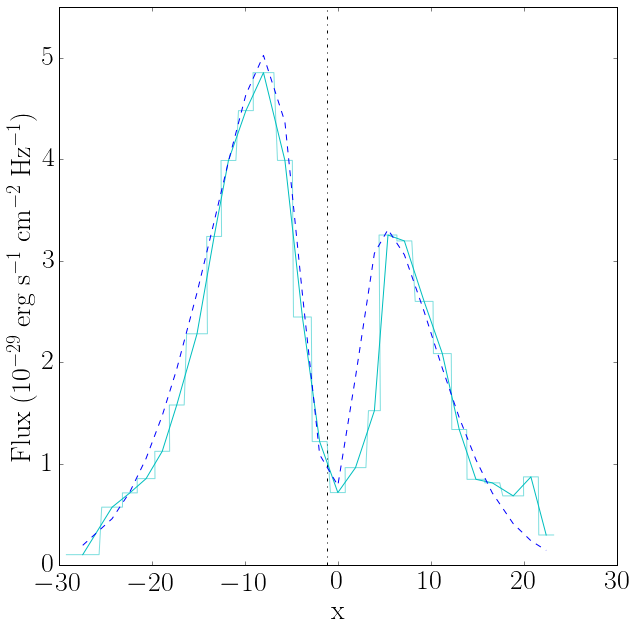

In [9]:
f = figure(figsize = (10,10))
plot(x_x, y_x, c='c', alpha=0.5)
plot(x_xp, y_xp, c='c')
plot(x_x_fit0, y_x_fit0, c='b', linestyle='--')
vlines(x_x[half],0,5.5,linestyle='-.')
xlabel('$\mathrm{x}$')
ylabel('$\mathrm{Flux\;(10^{-29}\;erg\;s^{-1}\;cm^{-2}\;Hz^{-1})}$')
ylim(0,5.5)

Mean acceptance fraction: 0.108
amplitude_neg =  (63.484534824979193, 7.7412114824344798, 4.8920562462644384)
center_neg =  (-9.8651877061865605, 1.8873589188069735, 2.6086013349413406e-09)
sigma_neg =  (1.6274000012920413e-15, 9.3145902768977367e-09, 1.6274000012920413e-15)
gamma_neg =  (-7.6383547844715096, 1.2742807399458691, 7.3255150571248038)
amplitude_pos =  (78.845627026683815, 2.2072357072890867, 4.1701396372383641)
center_pos =  (4.4166843912123488, 5.4561917273898102, 3.0851337734814699)
sigma_pos =  (23.130873786911781, 2.1519050744670061, 5.1651591759979745)
gamma_pos =  (6.1423849443429424, 2.438821249056466, 2.1579036859463336)


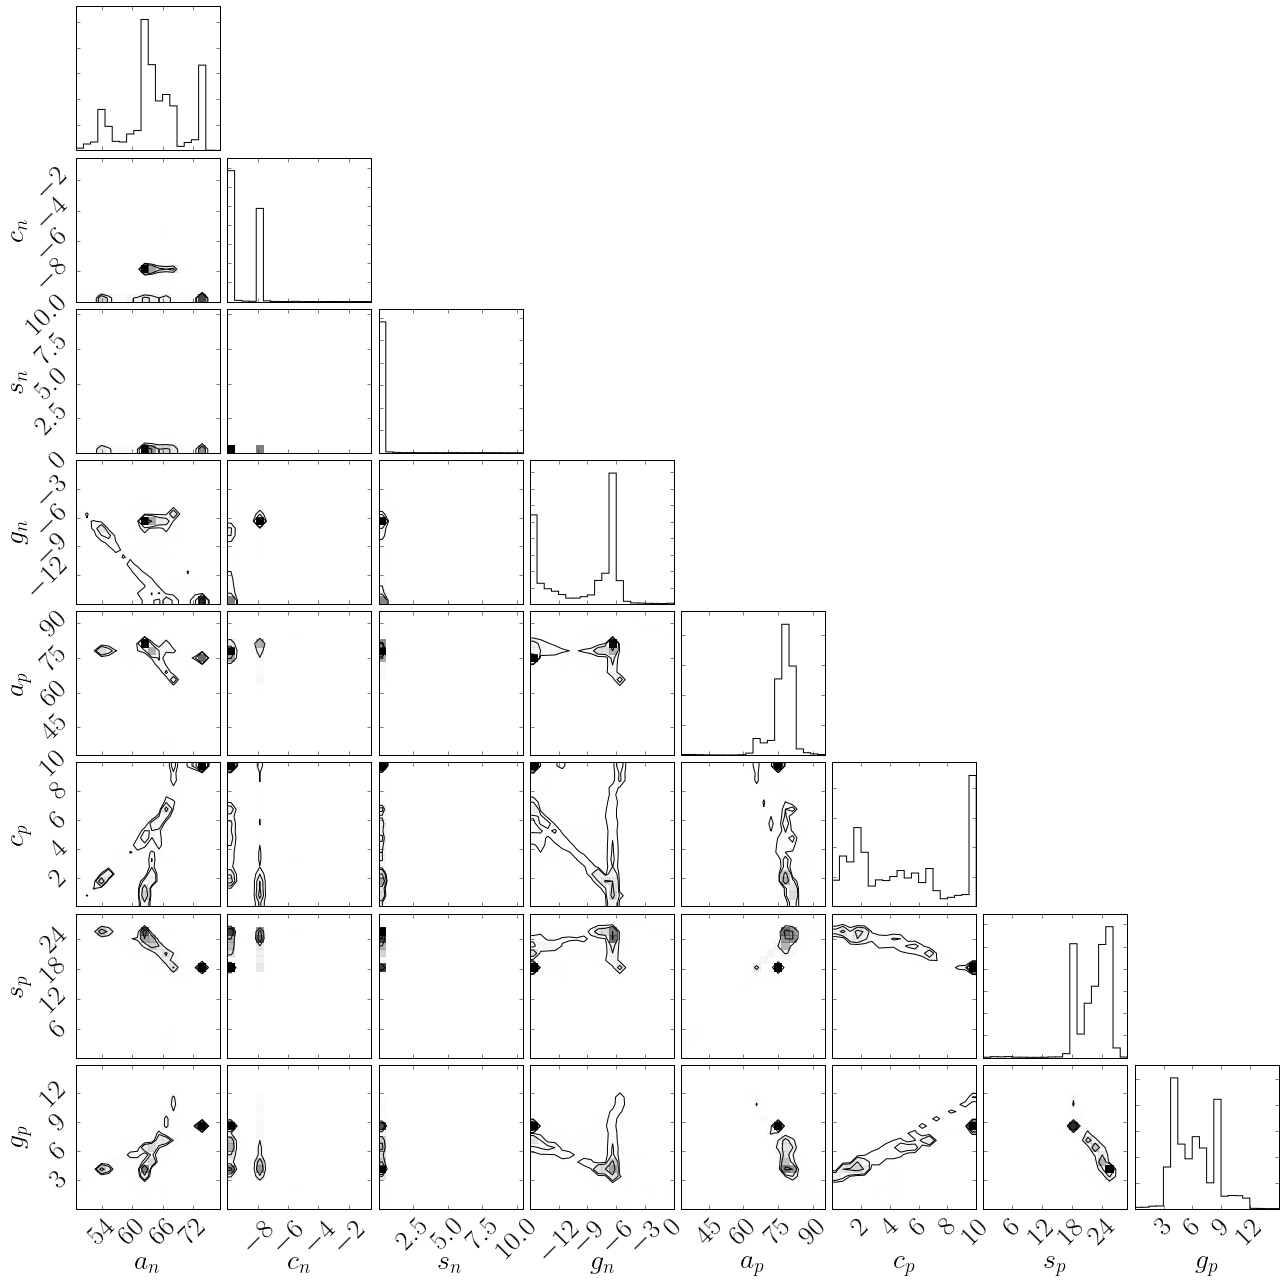

In [10]:
amplitude_neg, center_neg, sigma_neg, gamma_neg, amplitude_pos, center_pos, sigma_pos, gamma_pos = emcee_skewed_gaussian(x_xp, y_xp)

In [11]:
x_x_fit = x_xp
y_x_fit = sum_2_skewed_gaussian(x_x_fit, amplitude_neg, center_neg, sigma_neg, gamma_neg, amplitude_pos, center_pos, sigma_pos, gamma_pos)

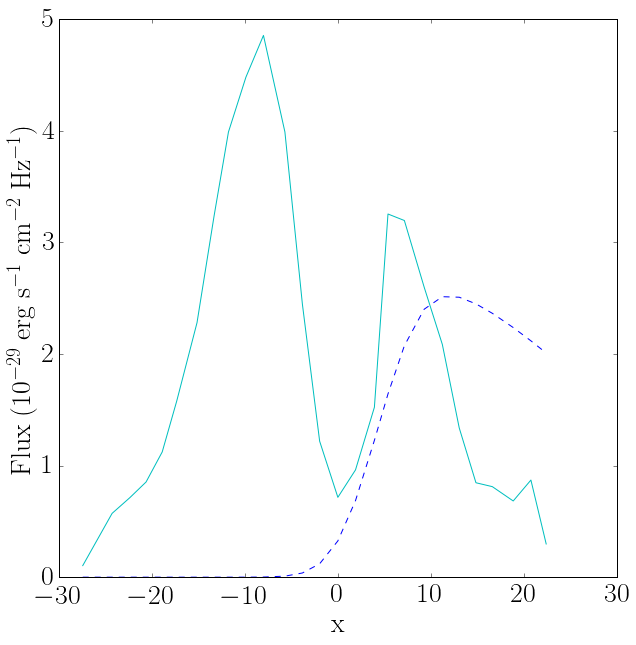

In [12]:
f = figure(figsize = (10,10))
plot(x_xp, y_xp, c='c')
plot(x_x_fit, y_x_fit, c='b', linestyle='--')
xlabel('$\mathrm{x}$')
ylabel('$\mathrm{Flux\;(10^{-29}\;erg\;s^{-1}\;cm^{-2}\;Hz^{-1})}$')
savefig('gaussian_fit_kulas.png')

In [13]:
gaussian_fit_file = open('gaussian_fit_kulas.dat','w')
gaussian_fit_file.write('amplitude_neg\tsigma_neg\tcenter_neg\tgamma_neg\tamplitude_pos\tsigma_pos\tcenter_pos\tgamma_pos\n')
gaussian_fit_file.write(str(amplitude_neg)+'\t'+str(sigma_neg)+'\t'+str(center_neg)+'\t'+str(gamma_neg)+'\t'+str(amplitude_pos)+'\t'+str(sigma_pos)+'\t'+str(center_pos)+'\t'+str(gamma_pos))
gaussian_fit_file.close()

In [14]:
print (1.0/2.0)*sum((y_xp-y_x_fit0)**2)
print (1.0/2.0)*sum((y_xp-y_x_fit)**2)

2.28820225924
60.5292376352
